In [1]:
import sys
import time
import traceback
import os
from arduino_iot_cloud import ArduinoCloudClient
import csv 
import time
import plotly.io as pio
import plotly.express as px
import pandas as pd
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt

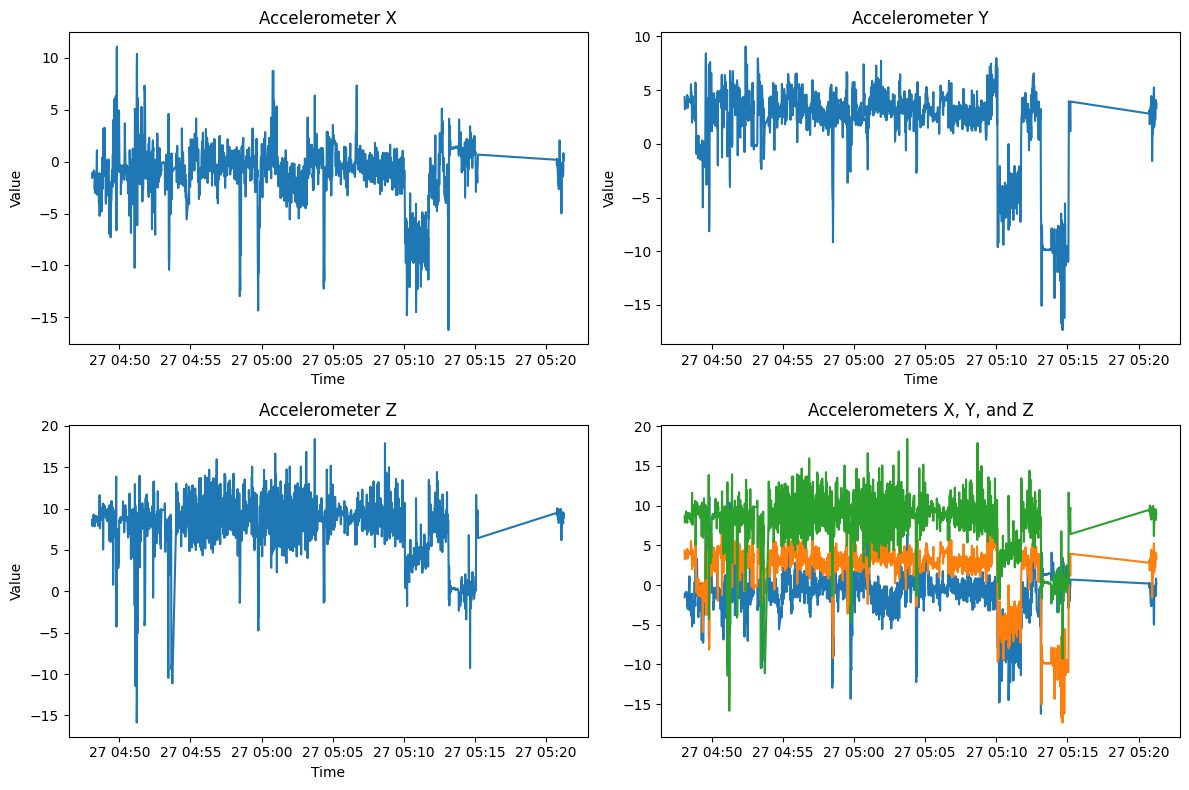

In [11]:

# Load the data
accelerometer_x = pd.read_csv('Accelerometer_X.csv')
accelerometer_y = pd.read_csv('Accelerometer_Y.csv')
accelerometer_z = pd.read_csv('Accelerometer_Z.csv')

accelerometer_x.time = pd.to_datetime(accelerometer_x.time)
accelerometer_y.time = pd.to_datetime(accelerometer_y.time)
accelerometer_z.time = pd.to_datetime(accelerometer_z.time)

# Plotting accelerometer_x
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(accelerometer_x['time'], accelerometer_x['value'])
plt.title('Accelerometer X')

# Plotting accelerometer_y
plt.subplot(2, 2, 2)
plt.plot(accelerometer_y['time'], accelerometer_y['value'])
plt.title('Accelerometer Y')

# Plotting accelerometer_z
plt.subplot(2, 2, 3)
plt.plot(accelerometer_z['time'], accelerometer_z['value'])
plt.title('Accelerometer Z')

# Plotting all three accelerometers
plt.subplot(2, 2, 4)
plt.plot(accelerometer_x['time'], accelerometer_x['value'], label='X')
plt.plot(accelerometer_y['time'], accelerometer_y['value'], label='Y')
plt.plot(accelerometer_z['time'], accelerometer_z['value'], label='Z')
plt.title('Accelerometers X, Y, and Z')


for i in range(3):
    plt.subplot(2,2,i+1)
    plt.xlabel('Time')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [ ]:
### Receiving the data from Python

In [2]:

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='live-update-graph'),
    dcc.Interval(id='interval-component', interval=1000, n_intervals=0)  # Update every second  
])

@app.callback(
    Output('live-update-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)

def update_graph(n_intervals):
    global cur_data
    # Convert to DataFrame for Plotly
    df = pd.DataFrame(cur_data, columns=['index','Timestamp', 'X', 'Y', 'Z'])
    fig = px.line(df, x= 'Timestamp', y = ['X','Y','Z'])  # Scatter plot

    return fig

In [ ]:
import sys
import time
import traceback
import os
from arduino_iot_cloud import ArduinoCloudClient
import csv

DEVICE_ID = "cb764dbc-a4af-4f9a-b7ea-e6787e784323"
SECRET_KEY = "nwre!eCgb1EgUPUIA7k6S1pJg"

# Define the variables to store the accelerometer data
cur_data = []
temp_data = []
x, y, z = 0, 0, 0
count = 0
N_SAMPLES = 20

# =============================================================================
# Define the callback function for accelerometer_x changes
def on_accelerometer_x_changed(client, value):
    global x
    x = value

# Define the callback function for accelerometer_y changes
def on_accelerometer_y_changed(client, value):
    global y
    y = value

# Define the callback function for accelerometer_z changes
def on_accelerometer_z_changed(client, value):
    global z
    z = value
            
#================================= MAIN FUNCTION =================================
if __name__ == "__main__":
    try:
        # Instantiate Arduino cloud client
        client = ArduinoCloudClient(device_id=DEVICE_ID, username=DEVICE_ID, password=SECRET_KEY, sync_mode = True)
        
        # Register the callback functions
        client.register("py_x", value=None, on_write=on_accelerometer_x_changed)
        client.register("py_y", value=None, on_write=on_accelerometer_y_changed)
        client.register("py_z", value=None, on_write=on_accelerometer_z_changed)

        client.start()

        # Keep the client running
        while True:
            if x is not None and y is not None and z is not None:
                if count < N_SAMPLES:
                    count += 1
                    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')
                    temp_data.append([count,timestamp,x,y,z])
                    print([count,timestamp,x,y,z])
                    x, y, z = None, None, None
                else:
                    timestamp = time.strftime('%Y-%m-%d_%H-%M-%S')
                    df = pd.DataFrame(temp_data, columns=['index','Timestamp', 'X', 'Y', 'Z'])
                    df.to_csv(f"csv_{timestamp}.csv")
                    fig = px.line(df, x= 'Timestamp', y = ['X','Y','Z'])  # Scatter plot
                    filename = f"images/plot_{timestamp}.png"  # Correct filename format
                    pio.write_image(fig, filename)
                    count = 0
                    cur_data = temp_data.copy()
                    temp_data.clear()
            client.update()
    except:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        traceback.print_tb(exc_type, file=print)

[1, '2025-05-01 16:55:28', 0, 0, 0]
[2, '2025-05-01 16:55:29', -0.08700000494718552, -0.3570000231266022, 10.159050941467285]
[3, '2025-05-01 16:55:36', -0.11400000751018524, -0.3460500240325928, 10.18005084991455]
[4, '2025-05-01 16:55:37', -0.10005000233650208, -0.2550000250339508, 10.030050277709961]
[5, '2025-05-01 16:55:38', -0.30900001525878906, -0.3720000088214874, 10.18695068359375]
[6, '2025-05-01 16:55:39', -0.1189500093460083, -0.3550500273704529, 10.144050598144531]
[7, '2025-05-01 16:55:40', -0.17295001447200775, -0.3730500042438507, 10.180950164794922]
[8, '2025-05-01 16:55:41', -0.15195000171661377, -0.2939999997615814, 10.210050582885742]
[9, '2025-05-01 16:55:42', -0.1680000126361847, -0.37005001306533813, 10.194000244140625]
[10, '2025-05-01 16:55:43', -0.15105000138282776, -0.36900001764297485, 10.195050239562988]
[11, '2025-05-01 16:55:44', -0.15195000171661377, -0.21300001442432404, 10.189050674438477]
[12, '2025-05-01 16:55:45', -0.15105000138282776, -0.3070500195

In [4]:
import dash
from dash import html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Hello, Dash!")
])

# Run the app
app.run_server(debug=True, jupyter_tab=True)  # Only works in Jupyter-compatible environments

In [5]:
_df = pd.read_csv("csv_2025-05-01_16-55-55.csv")
_df.drop(columns ={"Unnamed: 0", "index"}, inplace = True)
_df.Timestamp = pd.to_datetime(_df.Timestamp)
_df.set_index("Timestamp", inplace = True)

In [6]:
act_1 = _df.between_time("16:55:28", "16:55:32")
act_2 = _df.between_time("16:55:32", "16:55:36")
act_3 = _df.between_time("16:55:36", "16:55:40")
act_4 = _df.between_time("16:55:40", "16:55:44")
act_5 = _df.between_time("16:55:44", "16:55:48")

In [7]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2025-05-01 16:55:28 to 2025-05-01 16:55:29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       2 non-null      float64
 1   Y       2 non-null      float64
 2   Z       2 non-null      float64
dtypes: float64(3)
memory usage: 64.0 bytes


<Axes: xlabel='Timestamp', ylabel='X'>

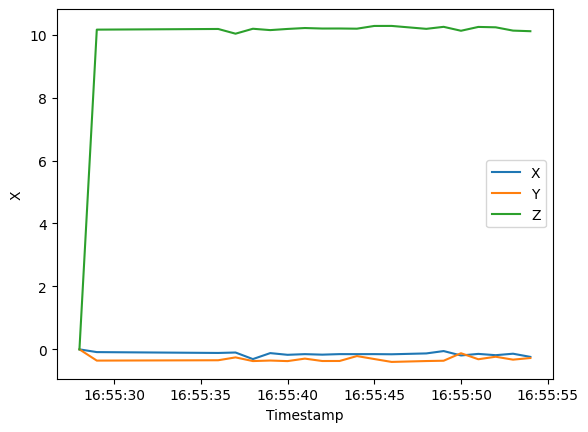

In [9]:
figsize = (16,9)
sns.lineplot(x=_df.index, y=_df["X"], label="X")
sns.lineplot(x=_df.index, y=_df["Y"], label="Y")
sns.lineplot(x=_df.index, y=_df["Z"], label="Z")

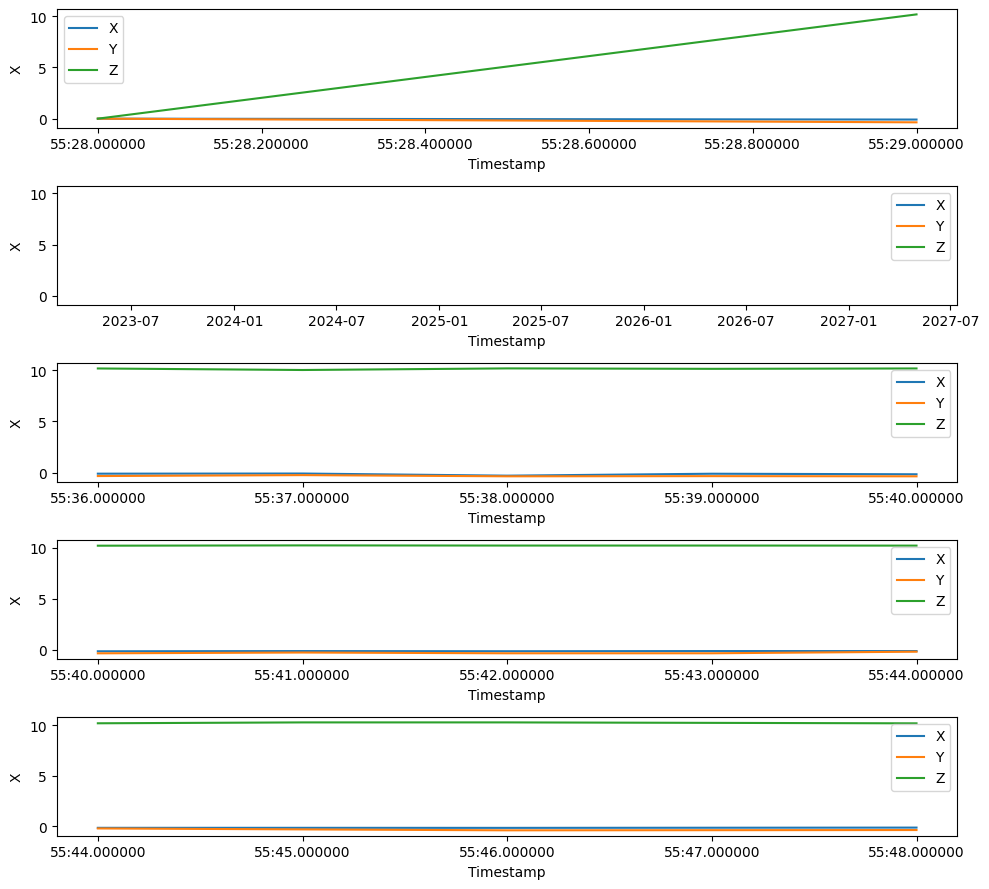

In [10]:
fig, ax = plt.subplots(5, figsize = (10,9))

for i, data in enumerate([act_1,act_2,act_3,act_4,act_5]):
    sns.lineplot(x=data.index, y=data["X"], label="X", ax = ax[i])
    sns.lineplot(x=data.index, y=data["Y"], label="Y", ax = ax[i])
    sns.lineplot(x=data.index, y=data["Z"], label="Z", ax = ax[i])
    ax[i].legend()

plt.tight_layout()
plt.show()

In [11]:
act_1.describe()

,X,Y,Z
count,2.000000,2.000000,2.000000
mean,-0.043500,-0.178500,5.079525
std,0.061518,0.252437,7.183534
min,-0.087000,-0.357000,0.000000
25%,-0.065250,-0.267750,2.539763
50%,-0.043500,-0.178500,5.079525
75%,-0.021750,-0.089250,7.619288
max,0.000000,0.000000,10.159051


In [12]:
act_2.describe()

,X,Y,Z
count,1.000,1.00000,1.000000
mean,-0.114,-0.34605,10.180051
std,NaN,NaN,NaN
min,-0.114,-0.34605,10.180051
25%,-0.114,-0.34605,10.180051
50%,-0.114,-0.34605,10.180051
75%,-0.114,-0.34605,10.180051
max,-0.114,-0.34605,10.180051
